In [7]:
pip install bokeh

  Using cached bokeh-2.4.3-py3-none-any.whl (18.5 MB)
     -------------------------------------- 151.7/151.7 kB 4.6 MB/s eta 0:00:00
  Using cached typing_extensions-4.3.0-py3-none-any.whl (25 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\satic\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [20]:
import scattertext as st

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import bokeh
from bokeh.plotting import figure, output_file, show

In [39]:
prime_data = pd.read_csv('C:/Users/satic/datavizwithpython/amazon_prime-kaggle/amazon_prime_titles.csv')

In [3]:
prime_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [14]:
type(prime_data['duration'])

pandas.core.series.Series

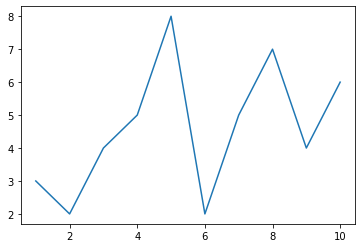

In [16]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [3, 2, 4, 5, 8, 2, 5, 7, 4, 6]) 

Text(0.5, 1.0, 'Sample Chart using plot.subplots')

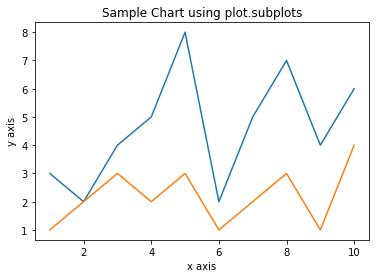

In [24]:
fig, ax = plt.subplots()
# Creating Dummy Data
ax.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [3, 2, 4, 5, 8, 2, 5, 7, 4, 6], label = 'data')
ax.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 2, 3, 1, 2, 3, 1, 4], label = 'data2')
# Setting plot labels
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_title('Sample Chart using plot.subplots')

In [48]:
prime_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int32
listed_in       object
description     object
dtype: object

In [46]:
prime_data["country"]= prime_data["duration"].str.replace("[Seasons]","")

C:\Windows\Temp\ipykernel_19772\1030362715.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  prime_data["duration"]= prime_data["duration"].str.replace("[Seasons]","")


In [44]:
prime_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [51]:
prime_data.show_id = prime_data.show_id.astype(str)

In [61]:
n_data = prime_data.groupby(['release_year', 'type'], as_index=False).show_id.count()
n_data.columns = ['release_year', 'type', 'count']
n_data_pivot = n_data.pivot(index='release_year', columns='type', values='count').reset_index()
n_data_pivot.fillna(0, inplace = True)
n_data_pivot.head()

type,release_year,Movie,TV Show
0,1920,3.0,0.0
1,1922,2.0,0.0
2,1923,1.0,0.0
3,1924,1.0,0.0
4,1925,8.0,0.0


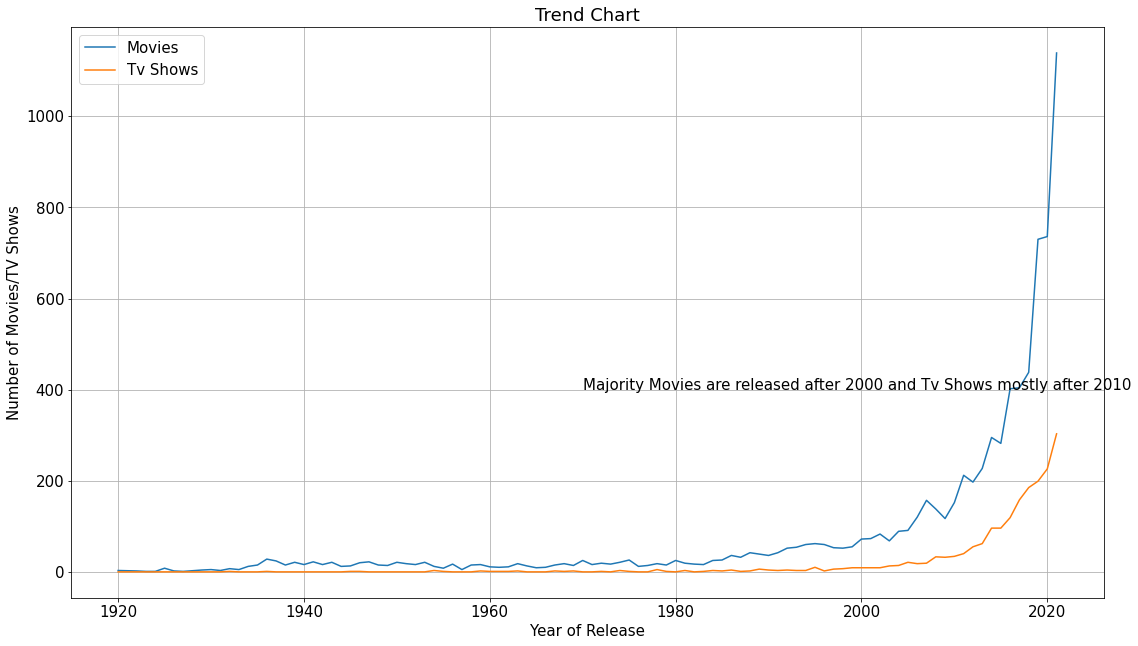

In [78]:
#  Declare a chart with one Axis
fig, ax = plt.subplots()  
# Creating some  dummy data
ax.plot(n_data_pivot.release_year, n_data_pivot.Movie, label = 'Movies')
ax.plot(n_data_pivot.release_year, n_data_pivot['TV Show'], label = 'Tv Shows') 
ax.set_ylabel('Number of Movies/TV Shows') 
ax.set_xlabel('Year of Release')
ax.set_title("Trend Chart")
plt.text(x=1970, y=400, s=r'Majority Movies are released after 2000 and Tv Shows mostly after 2010')#, fontsize = 12)
fig.set_size_inches(18.5, 10.5)
plt.grid()
ax.legend()

In [74]:
prime_data['year'] = prime_data['release_year']
n_data_added = prime_data.groupby(['year', 'type'], as_index=False).show_id.count()
n_data_added.columns = ['year', 'type', 'count']
n_data_added = n_data_added.pivot(index='year', columns='type', values='count').reset_index()
n_data_added.fillna(0, inplace = True)
n_data_added.head()

type,year,Movie,TV Show
0,1920,3.0,0.0
1,1922,2.0,0.0
2,1923,1.0,0.0
3,1924,1.0,0.0
4,1925,8.0,0.0


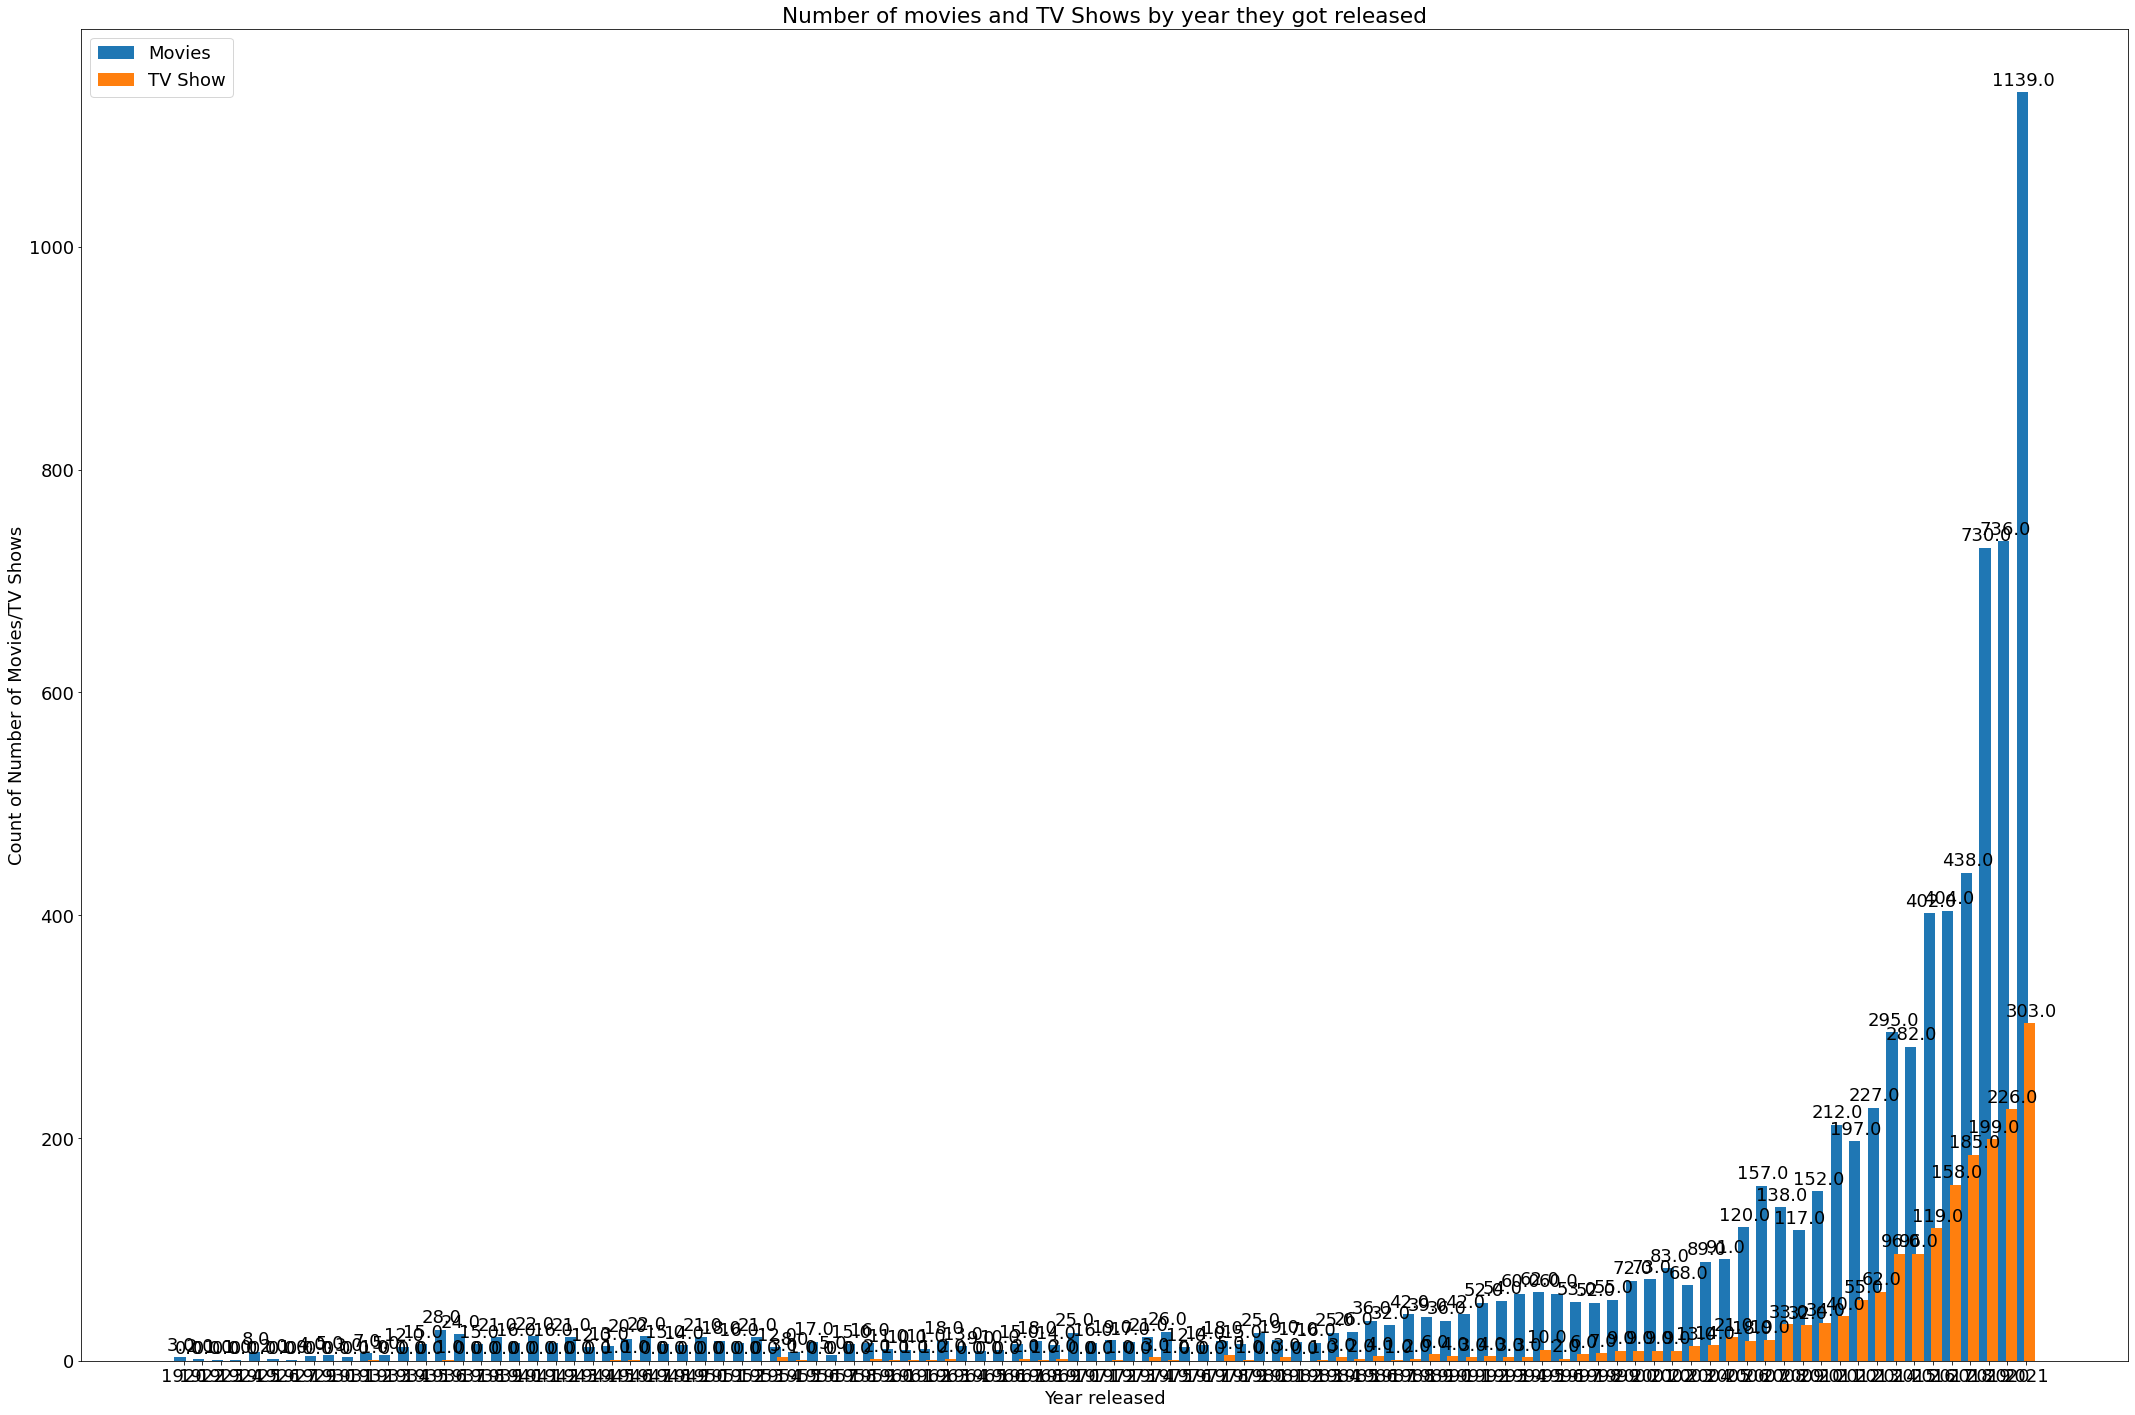

In [102]:
labels = n_data_added['year']

x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots()
Movies_rects = ax.bar(x - width/3, n_data_added['Movie'], width, label='Movies') # Add color here
TVshows_rects = ax.bar(x + width/3, n_data_added['TV Show'], width, label='TV Show')

# Add some text for labels, title, configure chart size
ax.set_xlabel('Year released')
ax.set_ylabel('Count of Number of Movies/TV Shows')
ax.set_title('Number of movies and TV Shows by year they got released')
ax.set_xticks(x)
ax.set_xticklabels(labels)
fig.set_size_inches(30, 20)
plt.rcParams.update({'font.size': 18})
ax.legend()

 #Function to generate labels on top of the bars
def gen_label(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(3, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


gen_label(Movies_rects)
gen_label(TVshows_rects)

fig.tight_layout()
plt.show()

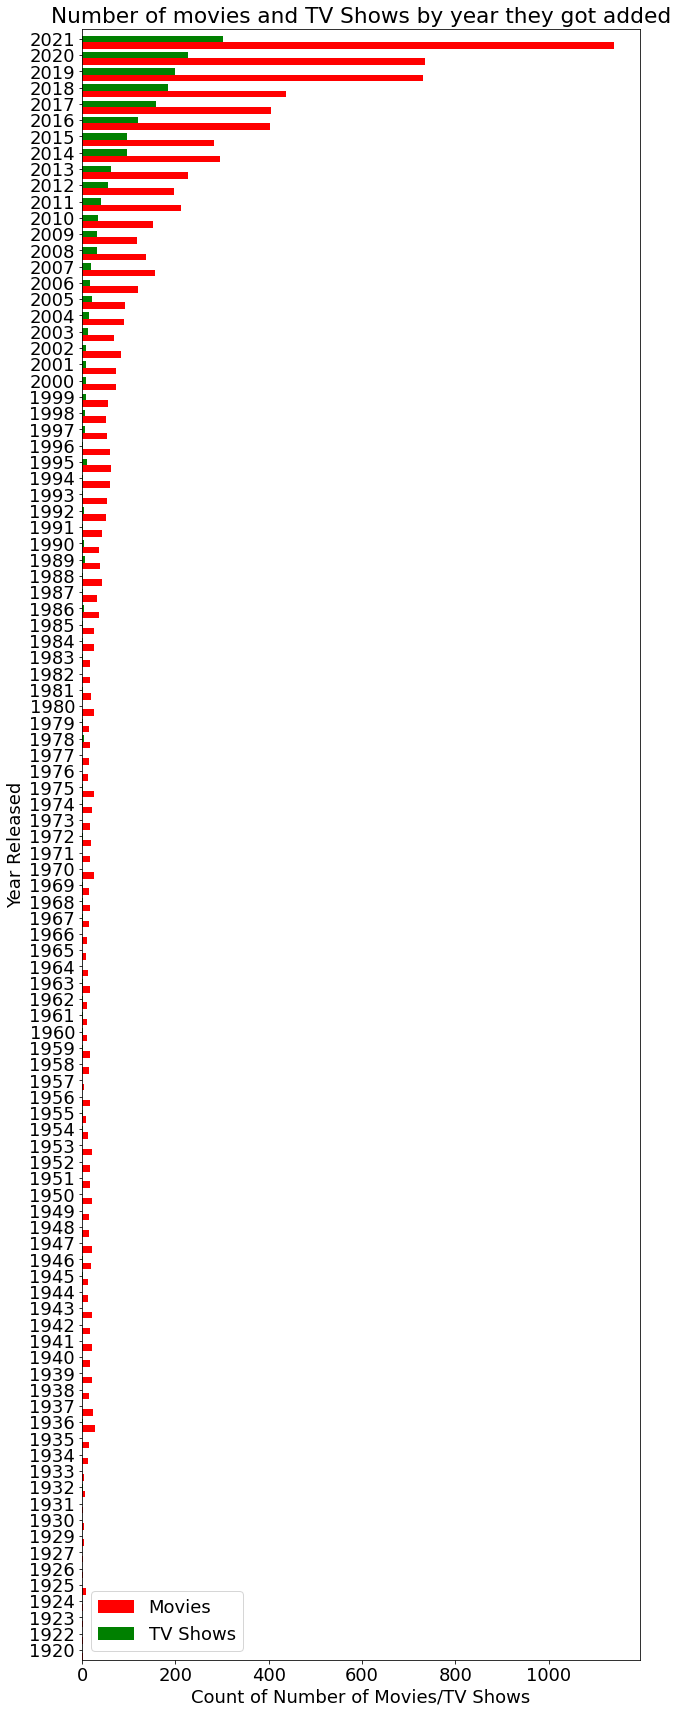

In [104]:
data = pd.DataFrame(dict(Year = n_data_added['year'],
                       Movie = n_data_added['Movie'], TVshow=n_data_added['TV Show'])) 

ind = np.arange(len(data))
width = 0.4

fig1, ax1 = plt.subplots()
ax1.barh(ind, data.Movie, width, color='red', label='Movies')
ax1.barh(ind + width, data.TVshow, width, color='green', label='TV Shows')

ax1.set(yticks=ind + width, yticklabels=data.Year, ylim=[2*width - 1, len(data)])

ax1.set_ylabel('Year Released')
ax1.set_xlabel('Count of Number of Movies/TV Shows')
ax1.set_title('Number of movies and TV Shows by year they got added')

ax1.legend()
fig1.set_size_inches(10, 30)
plt.show()

In [105]:
# Small modification to data to suit for the Pie Chart
n_data_added['Total'] = n_data_added['Movie'] + n_data_added['TV Show']
# To select last few rows only
n_data_added_flt = n_data_added[-4:]
n_data_added_flt = n_data_added_flt.reset_index(drop=True) # For resetting index
n_data_added_flt.head()

type,year,Movie,TV Show,Total
0,2018,438.0,185.0,623.0
1,2019,730.0,199.0,929.0
2,2020,736.0,226.0,962.0
3,2021,1139.0,303.0,1442.0


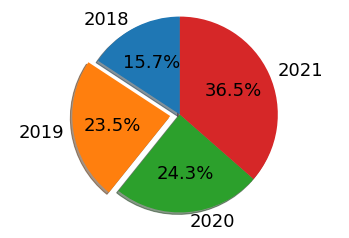

In [107]:
# Pie chart
labels = n_data_added_flt['year']
sizes = n_data_added_flt['Total']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice 

fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [70]:
# Data from: , C. (2019, August 29). Dataset of diabetes, taken from the hospital Frankfurt, Germany.| Kaggle. Kaggle. https://www.kaggle.com/competitions/diabetes/data?select=train.csv
dia_data = pd.read_csv('C:/Users/satic/datavizwithpython/diabetes_data.csv')
dia_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
0,2,138,62,35,0,33.6,0.127,47,1,0
1,0,135,68,42,250,42.3,0.365,24,1,3
2,0,173,78,32,265,46.5,1.159,58,0,5
3,4,99,72,17,0,25.6,0.294,28,0,6
4,8,194,80,0,0,26.1,0.551,67,0,7


In [113]:
# Pre-processing data for visualization
trfrm_data = dia_data.groupby(['Age', 'Outcome'], as_index=False).DiabetesPedigreeFunction.count()
trfrm_data.columns = ['Age', 'Outcome', 'Count']
trfrm_data.head()

,Age,Outcome,Count
0,21,0,105
1,21,1,11
2,22,0,120
3,22,1,26
4,23,0,56


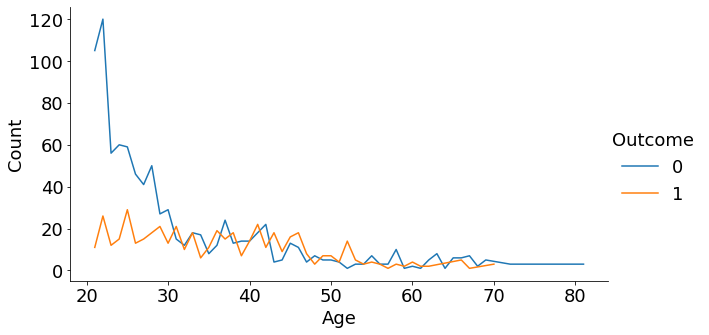

In [114]:
sns.relplot(x="Age", y="Count", 
            hue="Outcome" , aspect=16/9,
            kind="line", data=trfrm_data);

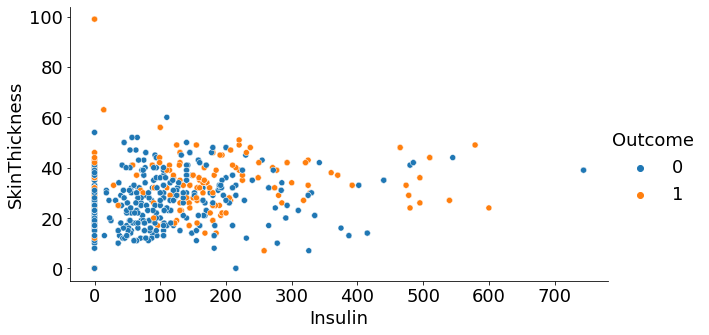

In [115]:
sns.relplot(x="Insulin", y="SkinThickness", 
            hue="Outcome", kind="scatter", # Kind is optional
            data=dia_data, aspect=16/9);

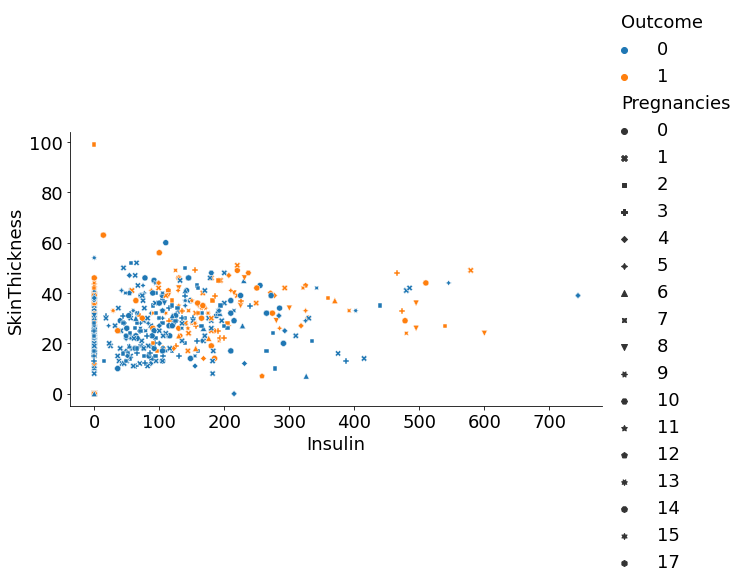

In [118]:
sns.relplot(x="Insulin", y="SkinThickness", 
            hue="Outcome", kind="scatter", # Kind is optional
            style="Pregnancies",
            data=dia_data, aspect=16/9);